## Data Analysis

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load HAM10000 metadata
ham_metadata = pd.read_csv(r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_metadata.csv')

# Map the 'dx' column to binary labels (1 for melanoma, 0 for non-melanoma)
ham_metadata['target'] = ham_metadata['dx'].apply(lambda x: 1 if x == 'mel' else 0)

In [3]:
ham_metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,0


In [4]:
ham_metadata.target.value_counts()

0    8902
1    1113
Name: target, dtype: int64

In [5]:
ham_metadata.drop(['dx', 'dx_type'], axis=1, inplace=True)

In [6]:
ham_metadata

,lesion_id,image_id,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,75.0,male,ear,0
...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,40.0,male,abdomen,0
10011,HAM_0002867,ISIC_0033550,40.0,male,abdomen,0
10012,HAM_0002867,ISIC_0033536,40.0,male,abdomen,0
10013,HAM_0000239,ISIC_0032854,80.0,male,face,0


C:\Users\ruthv\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


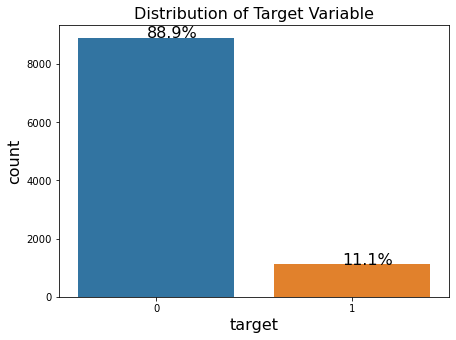

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(df, xlabel, ylabel, title):
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x=xlabel, data=df)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    total = len(df.target)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=16)
    plt.show()

# Assuming your DataFrame is named 'df_ham'
barplot(ham_metadata, 'target', 'count', 'Distribution of Target Variable')


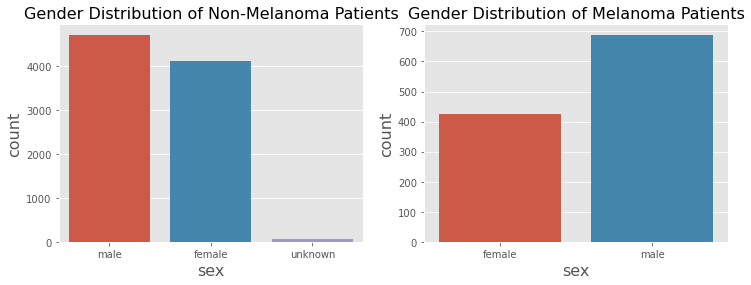

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df_ham'
def twoplot(data1, data2, xlabel, ylabel, title1, title2):
    plt.style.use('ggplot')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    a = sns.countplot(x=xlabel, data=data1, ax=ax1)
    b = sns.countplot(x=xlabel, data=data2, ax=ax2)
    ax1.set_title(title1, fontsize=16)
    ax2.set_title(title2, fontsize=16)
    ax1.set_xlabel(xlabel, size=16)
    ax1.set_ylabel(ylabel, size=16)
    ax2.set_xlabel(xlabel, size=16)
    ax2.set_ylabel(ylabel, size=16)

# Assuming your target variable is named 'target' and gender column is named 'sex'
twoplot(ham_metadata[ham_metadata.target == 0], ham_metadata[ham_metadata.target == 1], 'sex', 'count', "Gender Distribution of Non-Melanoma Patients", "Gender Distribution of Melanoma Patients")

plt.show()


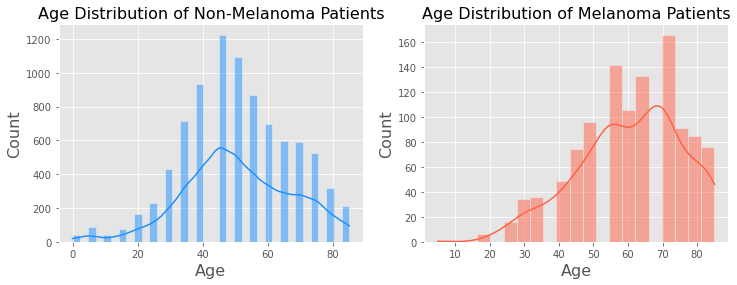

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'ham_metadata'
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age', data=ham_metadata[ham_metadata.target == 0], kde=True, color='dodgerblue', ax=ax1)
sns.histplot(x='age', data=ham_metadata[ham_metadata.target == 1], kde=True, color='tomato', ax=ax2)
ax1.set_title("Age Distribution of Non-Melanoma Patients", fontsize=16)
ax2.set_title("Age Distribution of Melanoma Patients", fontsize=16)
ax1.set_xlabel('Age', size=16)
ax1.set_ylabel('Count', size=16)
ax2.set_xlabel('Age', size=16)
ax2.set_ylabel('Count', size=16)

plt.show()


In [10]:
distinct_localizations = ham_metadata['localization'].unique()

In [11]:
print(distinct_localizations)

['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


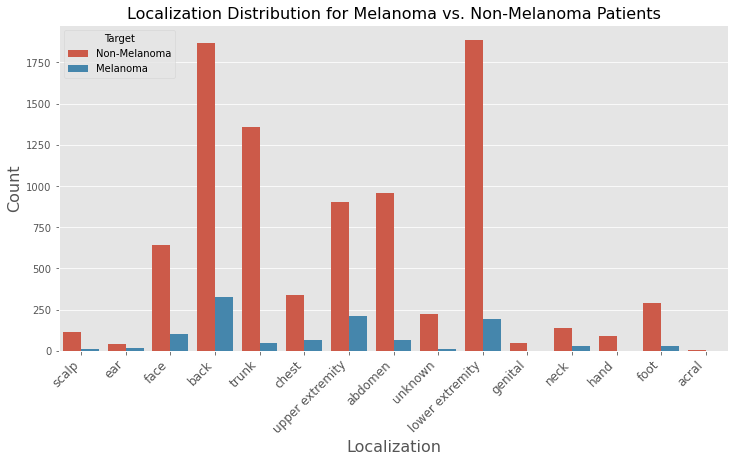

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns



# Create a visualization for the distribution of localization
plt.figure(figsize=(12, 6))
sns.countplot(x='localization', hue='target', data=ham_metadata)
plt.title("Localization Distribution for Melanoma vs. Non-Melanoma Patients", fontsize=16)
plt.xlabel('Localization', size=16)
plt.ylabel('Count', size=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Target', labels=['Non-Melanoma', 'Melanoma'])
plt.show()


## Data Preproccesing

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
ham_metadata['sex'] = label_encoder.fit_transform(ham_metadata['sex'])
ham_metadata['localization'] = label_encoder.fit_transform(ham_metadata['localization'])

# Assuming 'ham_metadata' is your DataFrame and 'target' is the target variable
X = ham_metadata.drop('target', axis=1)  # Features
y = ham_metadata['target']  # Target variable

# Split the data into training and testing sets (adjust test_size as needed)
ham_X_train, ham_X_test, ham_y_train, ham_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", ham_X_train.shape, ham_y_train.shape)
print("Testing set shape:", ham_X_test.shape, ham_y_test.shape)


Training set shape: (8012, 5) (8012,)
Testing set shape: (2003, 5) (2003,)


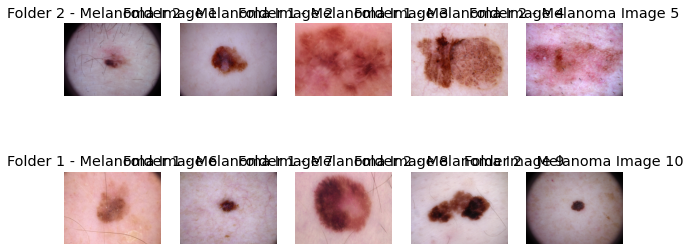

In [15]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ham_X_train' is your features DataFrame
# and 'ham_y_train' is your target variable Series
# You need to adjust the path to the actual location of your CSV file

# Paths to the folders containing the images
image_folder_1 = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_folder_2 = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_2'

# Combine 'ham_X_train' with 'ham_y_train' to get the full dataset
ham_dataset = pd.concat([ham_X_train, ham_y_train], axis=1)

# Select the first ten melanoma images
melanoma_images = ham_dataset[ham_dataset['target'] == 1]['image_id'].head(10)

# Display the first ten melanoma images from the available folder
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, (ax, image_id) in enumerate(zip(axes.flatten(), melanoma_images)):
    # Check if the image is present in folder 1
    img_path_1 = os.path.join(image_folder_1, f"{image_id}.jpg")
    if os.path.exists(img_path_1):
        img = Image.open(img_path_1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Folder 1 - Melanoma Image {i + 1}")
    else:
        # If not, load from folder 2
        img_path_2 = os.path.join(image_folder_2, f"{image_id}.jpg")
        img = Image.open(img_path_2)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Folder 2 - Melanoma Image {i + 1}")

plt.show()


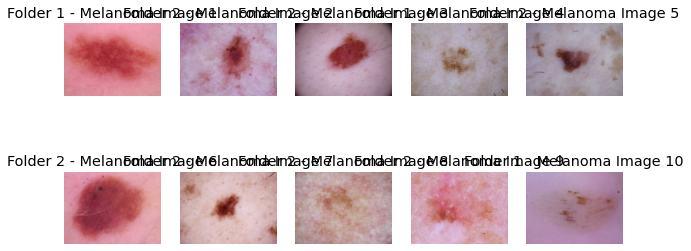

In [16]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ham_X_train' is your features DataFrame
# and 'ham_y_train' is your target variable Series
# You need to adjust the path to the actual location of your CSV file

# Paths to the folders containing the images
image_folder_1 = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_folder_2 = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_2'

# Combine 'ham_X_train' with 'ham_y_train' to get the full dataset
ham_dataset = pd.concat([ham_X_train, ham_y_train], axis=1)

# Select the first ten melanoma images
melanoma_images = ham_dataset[ham_dataset['target'] == 0]['image_id'].head(10)

# Display the first ten melanoma images from the available folder
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, (ax, image_id) in enumerate(zip(axes.flatten(), melanoma_images)):
    # Check if the image is present in folder 1
    img_path_1 = os.path.join(image_folder_1, f"{image_id}.jpg")
    if os.path.exists(img_path_1):
        img = Image.open(img_path_1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Folder 1 - Melanoma Image {i + 1}")
    else:
        # If not, load from folder 2
        img_path_2 = os.path.join(image_folder_2, f"{image_id}.jpg")
        img = Image.open(img_path_2)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Folder 2 - Melanoma Image {i + 1}")

plt.show()

In [17]:
ham_metadata

,lesion_id,image_id,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,80.0,1,11,0
1,HAM_0000118,ISIC_0025030,80.0,1,11,0
2,HAM_0002730,ISIC_0026769,80.0,1,11,0
3,HAM_0002730,ISIC_0025661,80.0,1,11,0
4,HAM_0001466,ISIC_0031633,75.0,1,4,0
...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,40.0,1,0,0
10011,HAM_0002867,ISIC_0033550,40.0,1,0,0
10012,HAM_0002867,ISIC_0033536,40.0,1,0,0
10013,HAM_0000239,ISIC_0032854,80.0,1,5,0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


ham_metadata.fillna(ham_metadata.mean(), inplace=True)


C:\Users\ruthv\AppData\Local\Temp\ipykernel_31008\2907768591.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ham_metadata.fillna(ham_metadata.mean(), inplace=True)


In [19]:
scaler = StandardScaler()
ham_X_train['age'] = scaler.fit_transform(ham_X_train[['age']])
ham_X_test['age'] = scaler.transform(ham_X_test[['age']])

In [20]:
ham_X_train

,lesion_id,image_id,age,sex,localization
6582,HAM_0004772,ISIC_0027223,-0.979683,0,2
7194,HAM_0002136,ISIC_0032914,1.373417,1,14
9446,HAM_0007333,ISIC_0033614,-0.685546,1,13
533,HAM_0006399,ISIC_0026219,0.491004,0,2
132,HAM_0002040,ISIC_0033900,-0.097271,0,9
...,...,...,...,...,...
5734,HAM_0005460,ISIC_0028199,-0.097271,0,9
5191,HAM_0005615,ISIC_0031067,-0.391408,0,12
5390,HAM_0005773,ISIC_0031096,-0.391408,0,9
860,HAM_0001053,ISIC_0030998,0.196867,0,3


## Image Enhansment

## CLAHE method

In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


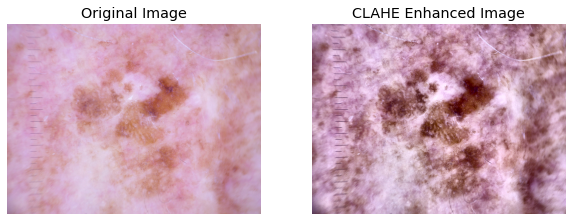

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'ham_metadata' is your DataFrame with 'image_id' column
# You may need to load it from the appropriate CSV file

# Function to apply CLAHE to an image
def apply_clahe(image):
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # Merge the enhanced L channel with the original A and B channels
    enhanced_lab = cv2.merge([cl, a, b])
    
    # Convert the LAB image back to RGB
    enhanced_rgb = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)
    
    return enhanced_rgb

# Example: Apply CLAHE to the first image in the dataset
image_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_path = os.path.join(image_folder, ham_metadata['image_id'][0] + '.jpg')
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Apply CLAHE
clahe_image = apply_clahe(original_image)

# Plot the original and CLAHE-enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE Enhanced Image')
plt.imshow(clahe_image)
plt.axis('off')

plt.show()


## Threshold model 

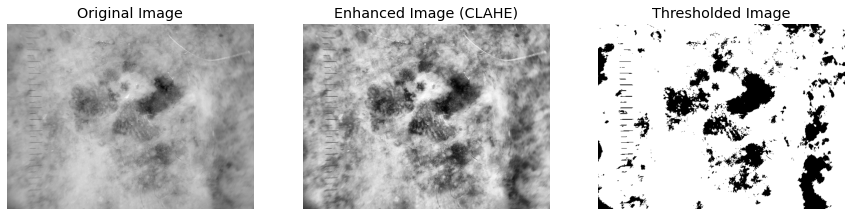

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_path = os.path.join(image_folder, ham_metadata['image_id'][0] + '.jpg')
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE for better results (optional)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(original_image)

# Apply a simple global threshold
threshold_value = 120  # You may need to adjust this value based on your images
_, thresholded_image = cv2.threshold(enhanced_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original, enhanced, and thresholded images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Enhanced Image (CLAHE)')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.show()


## Edge based segmentaion

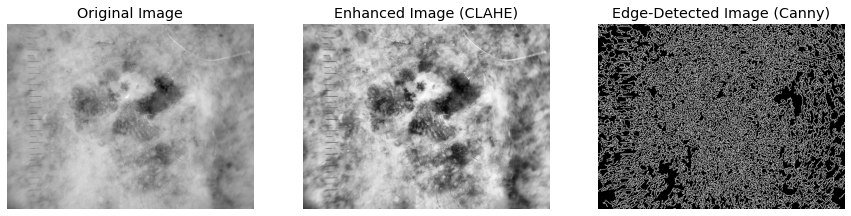

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_path = os.path.join(image_folder, ham_metadata['image_id'][0] + '.jpg')
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE for better results (optional)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(original_image)

# Apply the Canny edge detector
edges = cv2.Canny(enhanced_image, 30, 100)  # You may need to adjust the thresholds

# Display the original, enhanced, and edge-detected images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Enhanced Image (CLAHE)')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edge-Detected Image (Canny)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


## Watersheld Segmentation

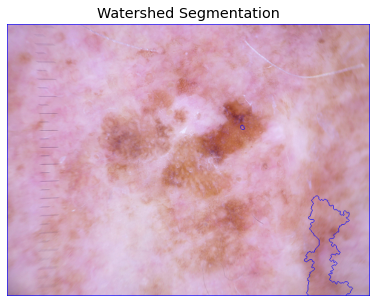

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_path = os.path.join(image_folder, ham_metadata['image_id'][0] + '.jpg')
original_image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0 but 1
markers = markers + 1

# Mark the region of unknown with 0
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(original_image, markers)

# Overlay the segmented regions on the original image
original_image[markers == -1] = [255, 0, 0]  # Mark the boundaries in blue

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()


# Clustering based segmentation

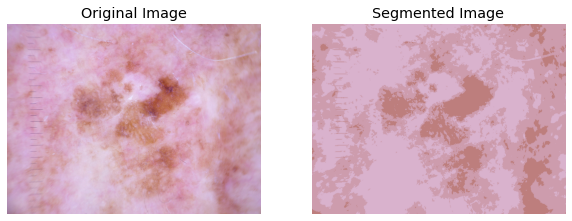

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_path = os.path.join(image_folder, ham_metadata['image_id'][0] + '.jpg')
original_image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Convert to float type
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (you can adjust this)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(image_rgb.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()


# Augmentation

## Noice addition

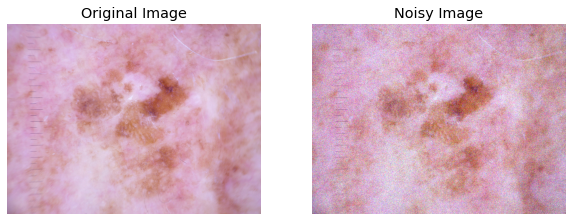

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_images_part_1'
image_path = os.path.join(image_folder, ham_metadata['image_id'][0] + '.jpg')
original_image = cv2.imread(image_path)

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

# Add Gaussian noise to the original image
noisy_image = add_gaussian_noise(original_image)

# Display the original and noisy images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
